In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [19]:
#Generation des donnees : time serie 
#on specifie la date de debut et de fin
#date debut 1er janvier 
#date fin fin decembre
start_date = '2021-01-01'
end_date = '2021-12-31'
time_index = pd.date_range(start=start_date, end=end_date, freq='D')

#Creation du dataframe avec comme index la colonne time
df = pd.DataFrame(index=time_index)

# Generation des données le chiller n'est pas activé
#HYPOTHESE le chiller n'est pas activé hors de l'été
#si on est pas en été la valeur est fixée à 0
#soit entre novembre jusqu a fin decembre 
#soit entre janvier jusqua mai


df.loc[(df.index >= '2021-10-20') & (df.index <= '2021-12-31'), 'rendement'] = 0
df.loc[(df.index >= '2021-01-01') & (df.index <= '2021-05-31'), 'rendement'] = 0

# Generation des données où le chiller est activé
#HYPOTHESE  le chiller n'est activé qu'en été
#on fixe la valeur du rendement comme une constante égale à 20

#ON AJOUTE DU BRUIT
#on considère que le rendement varie selon la temperature exterieure et d'autres facteurs 
#HYPOTHESE CETTE VARIATION A UN SEUIL MAX DE + OU MOINS 2 (valeur modifiable)
constante_rendement = 20
noise_std_rendement = 2

start_date_rendement = '2021-04-01'
end_date_rendement = '2021-10-20'

summer_data = constante_rendement + np.random.normal(0, noise_std_rendement, len(df.loc[(df.index >= start_date_rendement) & (df.index <= end_date_rendement)]))
df.loc[(df.index >= start_date_rendement) & (df.index <= end_date_rendement), 'rendement'] = summer_data



In [20]:
#GENERATION D UNE BAISSE DANS LE RENDEMENT

#On specifie la date de debut (utile pour les algorithmes de detection)
#(la baisse commence à un instant et à lieu pour toutes les données après)
start_date_baisse_rendement = '2021-08-15'

#On Filtre les lignes à partir de la date de début de la baisse
df_baisse = df.loc[df.index >= start_date_baisse_rendement].copy()

#On Applique une formule pour réduire progressivement la valeur de rendement

#HYPOTHESE 1 : DEGRADATION TRES LENTE : BAISSE PAR MOIS
#baisse de 5% PAR MOIS
#df_baisse.loc[:, 'rendement'] = df_baisse['rendement'] * (1 - 0.05 * ((df_baisse.index.year - pd.to_datetime(start_date_baisse_rendement).year) * 12 + (df_baisse.index.month - pd.to_datetime(start_date_baisse_rendement).month)))
#Calcule de la baisse en pourcentage en fonction du nombre de mois écoulés depuis la date de début de la baisse
# correspond à une baisse linéaire de 1% par jour. 

#HYPOTHESE 2 : DEGRADATION CONTINUE PROGRESSIVE : BAISSE CHAQUE JOUR
#baisse de 0.1% PAR JOUR
df_baisse.loc[:, 'rendement'] = df_baisse['rendement'] * (1 - 0.001 * (df_baisse.index - pd.to_datetime(start_date_baisse_rendement)).days)
#Calcule de la baisse en pourcentage en fonction du nombre de jours écoulés depuis la date de début de la baisse
# correspond à une baisse linéaire de 1% par jour. 


# Mise à jour les données dans le DataFrame d'origine
df.update(df_baisse)


In [21]:
df.reset_index(inplace=True)
df.rename(columns = {'index': 'timestamp_local'},inplace=True)

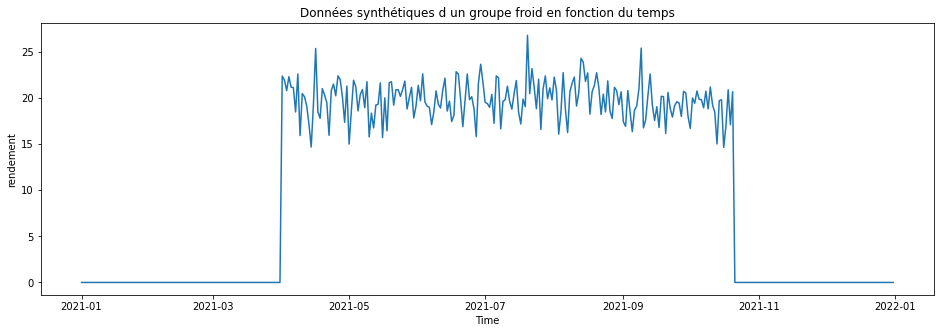

In [22]:
# Affichage des données
plt.figure(figsize=(16, 5))
plt.plot(df['timestamp_local'], df['rendement'])
plt.xlabel('Time')
plt.ylabel('rendement')
plt.title('Données synthétiques d un groupe froid en fonction du temps')
plt.show()

In [23]:
#SAUVEGARDE DU DATAFRAME DANS UN FICHIER CSV
df.to_csv('dataframe_donnees_synthetiques_Baisse_1_percent_per_day.csv')